# Big Data Technologies - NoSQL Databases: InfluxDB

## Task 1

InfluxDB was installed using Docker with the following command in a terminal:

docker run -d -p 8086:8086 --name influxdb2 -v influxdbv2:/var/lib/influxdb2 influxdb:2.7

In [1]:
# Start container if needed
!docker start influxdb2

influxdb2


## Task 2

During the web setup, the following configuration was created:

- Username: baehrhan
- Password: Saved in a separate text file 
- Organization: Big_Data_Technologies
- Bucket: Exam_Data
- API Token: Saved in a separate text file named 'InfluxDB_API.txt'

## Task 3

Step 1: Install InfluxDB Python Client Library:

In [ ]:
import pip
from gettext import install
!pip install influxdb-client

  Using cached influxdb_client-1.48.0-py3-none-any.whl.metadata (65 kB)
  Using cached reactivex-4.0.4-py3-none-any.whl.metadata (5.5 kB)
Using cached influxdb_client-1.48.0-py3-none-any.whl (746 kB)
Using cached reactivex-4.0.4-py3-none-any.whl (217 kB)
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 1.5 MB/s eta 0:00:01
   -------------------------- ------------- 0.8/1.2 MB 1.5 MB/s eta 0:00:01
   ---------------------------------- ----- 1.0/1.2 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Step 2: Import all packages for the subsequent steps and task:

In [1]:
import random
from influxdb_client import InfluxDBClient
from datetime import datetime, timedelta, timezone
from influxdb_client import Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS
from influxdb_client import QueryApi
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

print("Imported all packages!")

Imported all packages!


Step 3: Test the database connection. **Note:** For security reasons, the API token is read from an external file ('InfluxDB_API.txt'), which is not included in this submission:

In [3]:
# Read API token from external file
with open("InfluxDB_API.txt", "r") as f:
    token = f.read().strip()

# Set parameters
url = "http://localhost:8086"
token = token
org = "Big_Data_Technologies"
bucket = "Exam_Data"

# Create client
client = InfluxDBClient(url=url, token=token, org=org)

# Test: list existing buckets to confirm connection
buckets = client.buckets_api().find_buckets().buckets
for b in buckets:
    print(f"Bucket: {b.name}")

Bucket: _tasks
Bucket: Exam_Data
Bucket: _monitoring


## Task 4

Writing 200 random measurements for 2 labs each:

In [ ]:
# Create a write API
write_api = client.write_api(write_options=SYNCHRONOUS)

# Generate 100 random temperature readings
start_time = datetime.now(timezone.utc)
locations = ["lab1", "lab2"] 

# Initialize temperatures for each lab
temperatures = {"lab1": 22.0, "lab2": 21.5}

# Write 200 time steps: each step adds 2 measurements (1 per lab)
for i in range(200):
    timestamp = start_time + timedelta(seconds=i)
    
    for lab, temp in temperatures.items():
        # Apply small random fluctuation to each lab
        new_temp = round(temp + random.uniform(-0.2, 0.2), 2)
        temperatures[lab] = new_temp  # Update the temperature state

        point = (
            Point("weather_station")
            .tag("location", lab)
            .field("temperature", new_temp)
            .time(timestamp, WritePrecision.S)
        )

        write_api.write(bucket="Exam_Data", org=org, record=point)

print("Measurements written successfully.")

Measurements written successfully.


Check if 200 random measurements were assigned to each lab:

In [19]:
# Query all temperature data
flux_query = f'''
from(bucket: "Exam_Data")
  |> range(start: 0)
  |> filter(fn: (r) => r._measurement == "weather_station")
  |> filter(fn: (r) => r._field == "temperature")
'''

# Execute the query
query_api = client.query_api()
tables = query_api.query(flux_query, org=org)

# Parse all location tags
locations = []

for table in tables:
    for record in table.records:
        locations.append(record.values["location"])

# Count entries per location
counts = Counter(locations)
total = sum(counts.values())

# Print results
print(f"Total measurements: {total}")
for loc, count in counts.items():
    print(f"{loc}: {count} measurements")

# Optional check
print(f"Check passed: {total == 400 and all(c == 200 for c in counts.values())}")


Total measurements: 400
lab1: 200 measurements
lab2: 200 measurements
Check passed: True


## Task 5

Query All Data from the Bucket

In [20]:
# Create query API
query_api = client.query_api()

# Define query in Flux (InfluxDB’s query language)
flux_query = f'''
from(bucket: "Exam_Data")
  |> range(start: 0)
  |> filter(fn: (r) => r._measurement == "weather_station")
  |> filter(fn: (r) => r._field == "temperature")
'''

# Execute query
tables = query_api.query(flux_query, org=org)

# Parse and print results
for table in tables:
    for record in table.records:
        print(f"Time: {record.get_time()}, Location: {record.values['location']}, Temp: {record.get_value()}°C")
        i+=1

Time: 2025-05-07 19:29:21+00:00, Location: lab1, Temp: 22.08°C
Time: 2025-05-07 19:29:22+00:00, Location: lab1, Temp: 21.95°C
Time: 2025-05-07 19:29:23+00:00, Location: lab1, Temp: 21.9°C
Time: 2025-05-07 19:29:24+00:00, Location: lab1, Temp: 21.88°C
Time: 2025-05-07 19:29:25+00:00, Location: lab1, Temp: 21.84°C
Time: 2025-05-07 19:29:26+00:00, Location: lab1, Temp: 21.78°C
Time: 2025-05-07 19:29:27+00:00, Location: lab1, Temp: 21.69°C
Time: 2025-05-07 19:29:28+00:00, Location: lab1, Temp: 21.63°C
Time: 2025-05-07 19:29:29+00:00, Location: lab1, Temp: 21.57°C
Time: 2025-05-07 19:29:30+00:00, Location: lab1, Temp: 21.63°C
Time: 2025-05-07 19:29:31+00:00, Location: lab1, Temp: 21.59°C
Time: 2025-05-07 19:29:32+00:00, Location: lab1, Temp: 21.51°C
Time: 2025-05-07 19:29:33+00:00, Location: lab1, Temp: 21.38°C
Time: 2025-05-07 19:29:34+00:00, Location: lab1, Temp: 21.4°C
Time: 2025-05-07 19:29:35+00:00, Location: lab1, Temp: 21.49°C
Time: 2025-05-07 19:29:36+00:00, Location: lab1, Temp: 21

Another example -> Just filter for 'lab2':

In [21]:
flux_query = f'''
from(bucket: "Exam_Data")
  |> range(start: 0)
  |> filter(fn: (r) => r._measurement == "weather_station")
  |> filter(fn: (r) => r._field == "temperature")
  |> filter(fn: (r) => r.location == "lab2")
'''

# Run the query
tables = query_api.query(flux_query, org=org)

# Print results
print("All temperature readings for lab2:\n")

for table in tables:
    for record in table.records:
        print(f"Time: {record.get_time()}, Temp: {record.get_value()}°C")


All temperature readings for lab2:

Time: 2025-05-07 19:29:21+00:00, Temp: 21.42°C
Time: 2025-05-07 19:29:22+00:00, Temp: 21.31°C
Time: 2025-05-07 19:29:23+00:00, Temp: 21.19°C
Time: 2025-05-07 19:29:24+00:00, Temp: 21.19°C
Time: 2025-05-07 19:29:25+00:00, Temp: 21.04°C
Time: 2025-05-07 19:29:26+00:00, Temp: 20.99°C
Time: 2025-05-07 19:29:27+00:00, Temp: 21.06°C
Time: 2025-05-07 19:29:28+00:00, Temp: 20.89°C
Time: 2025-05-07 19:29:29+00:00, Temp: 21.0°C
Time: 2025-05-07 19:29:30+00:00, Temp: 21.13°C
Time: 2025-05-07 19:29:31+00:00, Temp: 21.1°C
Time: 2025-05-07 19:29:32+00:00, Temp: 21.17°C
Time: 2025-05-07 19:29:33+00:00, Temp: 21.27°C
Time: 2025-05-07 19:29:34+00:00, Temp: 21.3°C
Time: 2025-05-07 19:29:35+00:00, Temp: 21.35°C
Time: 2025-05-07 19:29:36+00:00, Temp: 21.31°C
Time: 2025-05-07 19:29:37+00:00, Temp: 21.18°C
Time: 2025-05-07 19:29:38+00:00, Temp: 21.28°C
Time: 2025-05-07 19:29:39+00:00, Temp: 21.16°C
Time: 2025-05-07 19:29:40+00:00, Temp: 21.17°C
Time: 2025-05-07 19:29:41+0

Visualization of all measurements for both labs:

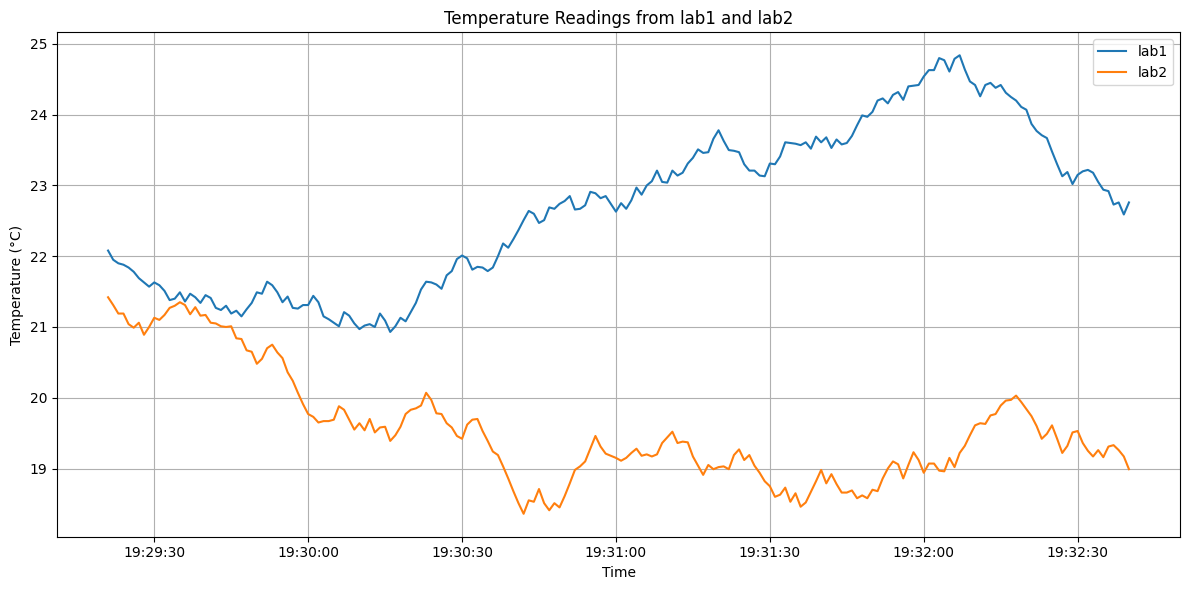

In [22]:
# Query all temperature data from both labs
flux_query = f'''
from(bucket: "Exam_Data")
  |> range(start: 0)
  |> filter(fn: (r) => r._measurement == "weather_station")
  |> filter(fn: (r) => r._field == "temperature")
'''

# Run the query
tables = query_api.query(flux_query, org=org)

# Parse into a list of records
records = []
for table in tables:
    for record in table.records:
        records.append({
            "time": record.get_time(),
            "location": record.values["location"],
            "temperature": record.get_value()
        })

# Convert to DataFrame
df = pd.DataFrame(records)

# Convert timestamp column to datetime and sort
df["time"] = pd.to_datetime(df["time"])
df = df.sort_values("time")

# Plot
plt.figure(figsize=(12, 6))
for location in df["location"].unique():
    subset = df[df["location"] == location]
    plt.plot(subset["time"], subset["temperature"], label=location)

plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Readings from lab1 and lab2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()